In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from treeple import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

In [2]:
def generate_linear_data(n_samples=1000):
    """Generate linear data as described in the paper."""
    t = np.linspace(0, 1, n_samples)
    X = np.column_stack([4*t, 6*t, 9*t])
    return X

def generate_helix_data(n_samples=1000):
    """Generate helix data as described in the paper."""
    t = np.linspace(2*np.pi, 9*np.pi, n_samples)
    X = np.column_stack([
        t * np.cos(t),
        t * np.sin(t),
        t
    ])
    return X

def generate_sphere_data(n_samples=1000):
    """Generate sphere data as described in the paper."""
    # Create a grid of points
    u = np.linspace(0, 2*np.pi, int(np.sqrt(n_samples)))
    v = np.linspace(0, np.pi, int(np.sqrt(n_samples)))
    u, v = np.meshgrid(u, v)
    
    # Convert to Cartesian coordinates
    r = 9  # radius
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    
    # Reshape to get n_samples points
    X = np.column_stack([
        x.flatten(),
        y.flatten(),
        z.flatten()
    ])
    return X[:n_samples]

def generate_gaussian_mixture_data(n_samples=1000):
    """Generate Gaussian mixture data as described in the paper."""
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Define mixture parameters
    weights = [0.3, 0.3, 0.4]
    means = [
        [-3, -3, -3],
        [0, 0, 0],
        [3, 3, 3]
    ]
    cov = np.eye(3)  # Identity covariance matrix
    
    # Generate samples
    n_components = len(weights)
    component_samples = np.random.multinomial(n_samples, weights)
    X = []
    
    for i in range(n_components):
        X.append(np.random.multivariate_normal(means[i], cov, component_samples[i]))
    
    X = np.vstack(X)
    return X

def plot_3d_data(X, title):
    """Create a 3D scatter plot of the data."""
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='b', marker='o', s=20, alpha=0.6)
    ax.set_title(title)
    plt.show()

def run_urf_experiment(X, title, n_noise_dims=0):
    """Run URerF on the data and compute similarity matrix."""
    if n_noise_dims > 0:
        # Add Gaussian noise dimensions
        noise = np.random.normal(0, 70, size=(X.shape[0], n_noise_dims))
        X = np.hstack([X, noise])
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize and fit URerF
    urf = UnsupervisedRandomForest(
        n_estimators=100,
        criterion='fastbic',
        min_samples_split='sqrt',
        random_state=42
    )
    
    # Fit and compute similarity matrix
    similarity_matrix = urf.fit_transform(X_scaled)
    
    return similarity_matrix


Processing Linear dataset...


C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` i


Processing Helix dataset...


C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` i

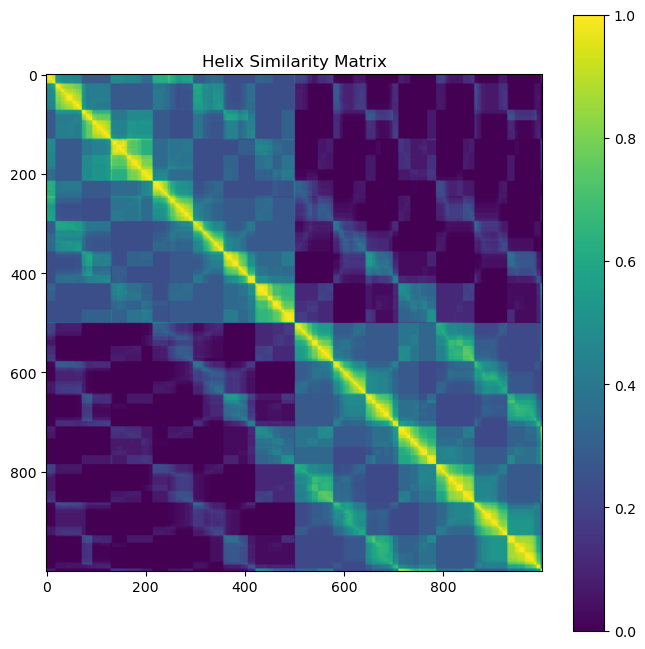


Processing Sphere dataset...


C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` i

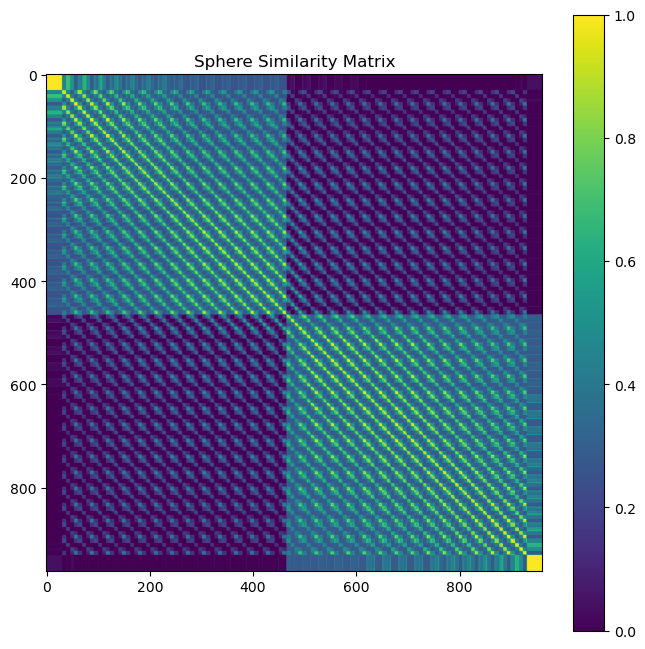

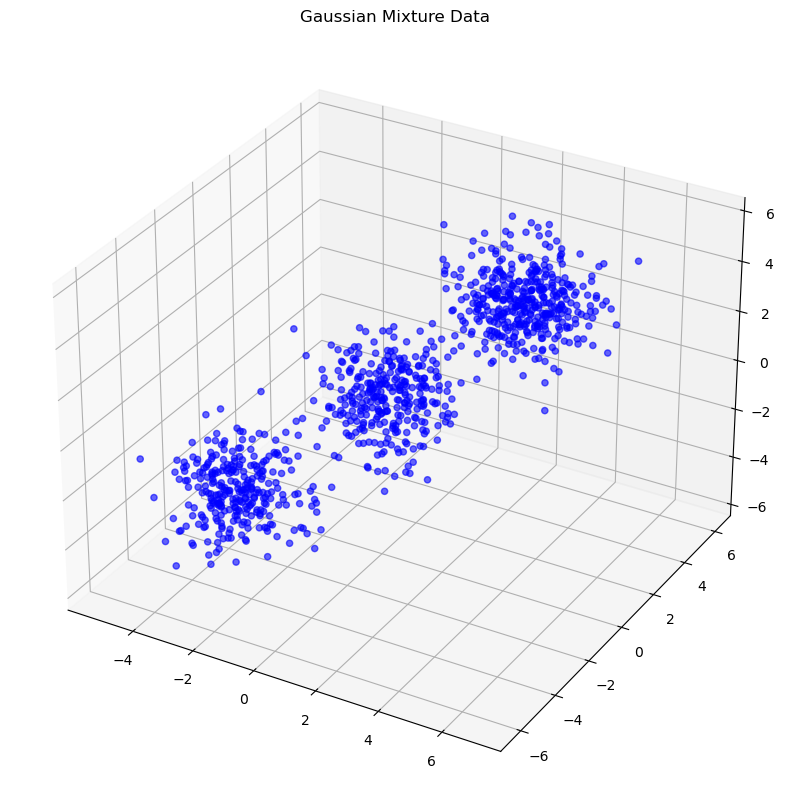


Processing Gaussian Mixture dataset...


C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jurgi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` i

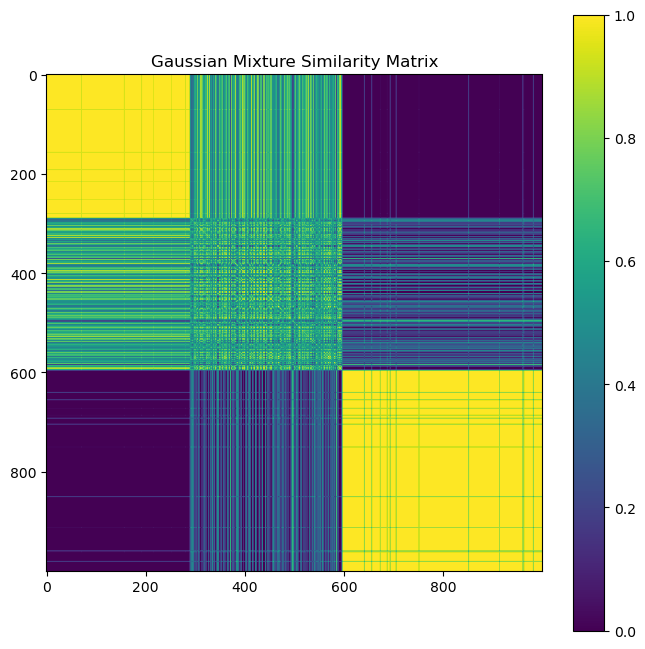

In [3]:
n_samples = 1000
datasets = {
    'Linear': generate_linear_data(n_samples),
    'Helix': generate_helix_data(n_samples),
    'Sphere': generate_sphere_data(n_samples),
    'Gaussian Mixture': generate_gaussian_mixture_data(n_samples)
}

# Plot original data
for name, data in datasets.items():
    plot_3d_data(data, f'{name} Data')

    # Run URerF without noise
    print(f"\nProcessing {name} dataset...")
    similarity_matrix = run_urf_experiment(data, name)

    # Plot similarity matrix
    plt.figure(figsize=(8, 8))
    plt.imshow(similarity_matrix, cmap='viridis')
    plt.colorbar()
    plt.title(f'{name} Similarity Matrix')
    plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from treeple import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist, squareform

In [26]:
def compute_true_geodesic_distances(X, manifold_type):
    """
    Compute the true geodesic distances for each manifold type.
    Returns a distance matrix where each entry (i,j) is the true geodesic distance
    between points i and j on the manifold.
    """
    if manifold_type == 'Linear':
        # For linear manifold, Euclidean distance is the geodesic distance
        return euclidean_distances(X)
    
    elif manifold_type == 'Helix':
        # For helix, we can use the parameter t as the geodesic distance
        t = np.arctan2(X[:, 1], X[:, 0]) / (2 * np.pi)
        t = t.reshape(-1, 1)
        return euclidean_distances(t)
    
    elif manifold_type == 'Sphere':
        # For sphere, use great circle distance
        R = 9  # radius from the paper
        X_normalized = X / np.linalg.norm(X, axis=1)[:, np.newaxis]
        cos_theta = np.clip(np.dot(X_normalized, X_normalized.T), -1.0, 1.0)
        return R * np.arccos(cos_theta)
    
    elif manifold_type == 'Gaussian Mixture':
        # For Gaussian mixture, points in same cluster have distance 1, different clusters have distance infinity
        centers = np.array([[-3, -3, -3], [0, 0, 0], [3, 3, 3]])
        labels = np.argmin(euclidean_distances(X, centers), axis=1)
        distances = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                distances[i,j] = 1 if labels[i] == labels[j] else np.inf
        return distances
    
    return euclidean_distances(X)

def compute_geodesic_precision_recall(true_distances, predicted_similarities, k_values):
    """
    Compute geodesic precision and recall for different k values.
    Returns precision and recall values averaged over all query points.
    """
    n_samples = len(true_distances)
    precisions = []
    recalls = []
    
    # Convert similarities to distances while preserving order (larger similarity = smaller distance)
    predicted_distances = -predicted_similarities  # Negative to convert similarity to distance
    
    for k in k_values:
        total_precision = 0
        total_recall = 0
        
        for i in range(n_samples):
            # Get indices of true k nearest neighbors (excluding self)
            true_sorted = np.argsort(true_distances[i])
            true_neighbors = true_sorted[1:k+1]  # exclude self
            
            # Get indices of predicted k nearest neighbors (excluding self)
            pred_sorted = np.argsort(predicted_distances[i])
            pred_neighbors = pred_sorted[1:k+1]  # exclude self
            
            # For each true neighbor, check if it's in predicted neighbors
            correct = 0
            for neighbor in true_neighbors:
                if neighbor in pred_neighbors:
                    correct += 1
            
            # Compute precision and recall
            precision = correct / k
            recall = correct / k
            
            total_precision += precision
            total_recall += recall
        
        # Average over all points
        precisions.append(total_precision / n_samples)
        recalls.append(total_recall / n_samples)
    
    return np.array(precisions), np.array(recalls)

In [27]:
def run_urf_experiment(X, manifold_type, n_noise_dims=0):
    """Run URerF on the data and compute similarity matrix."""
    # Suppress warnings
    import warnings
    warnings.filterwarnings('ignore', category=FutureWarning)
    
    if n_noise_dims > 0:
        # Add Gaussian noise dimensions with std=70 as in paper
        noise = np.random.normal(0, 70, size=(X.shape[0], n_noise_dims))
        X = np.hstack([X, noise])
    if n_noise_dims > 0:
        # Add Gaussian noise dimensions
        noise = np.random.normal(0, 70, size=(X.shape[0], n_noise_dims))
        X = np.hstack([X, noise])
    
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Initialize and fit URerF
    urf = UnsupervisedRandomForest(
        n_estimators=100,
        criterion='fastbic',
        min_samples_split='sqrt',
        random_state=42
    )
    
    # Fit and compute similarity matrix
    similarity_matrix = urf.fit_transform(X_scaled)
    
    return similarity_matrix


Processing Linear dataset...

Processing Helix dataset...

Processing Sphere dataset...

Processing Gaussian Mixture dataset...


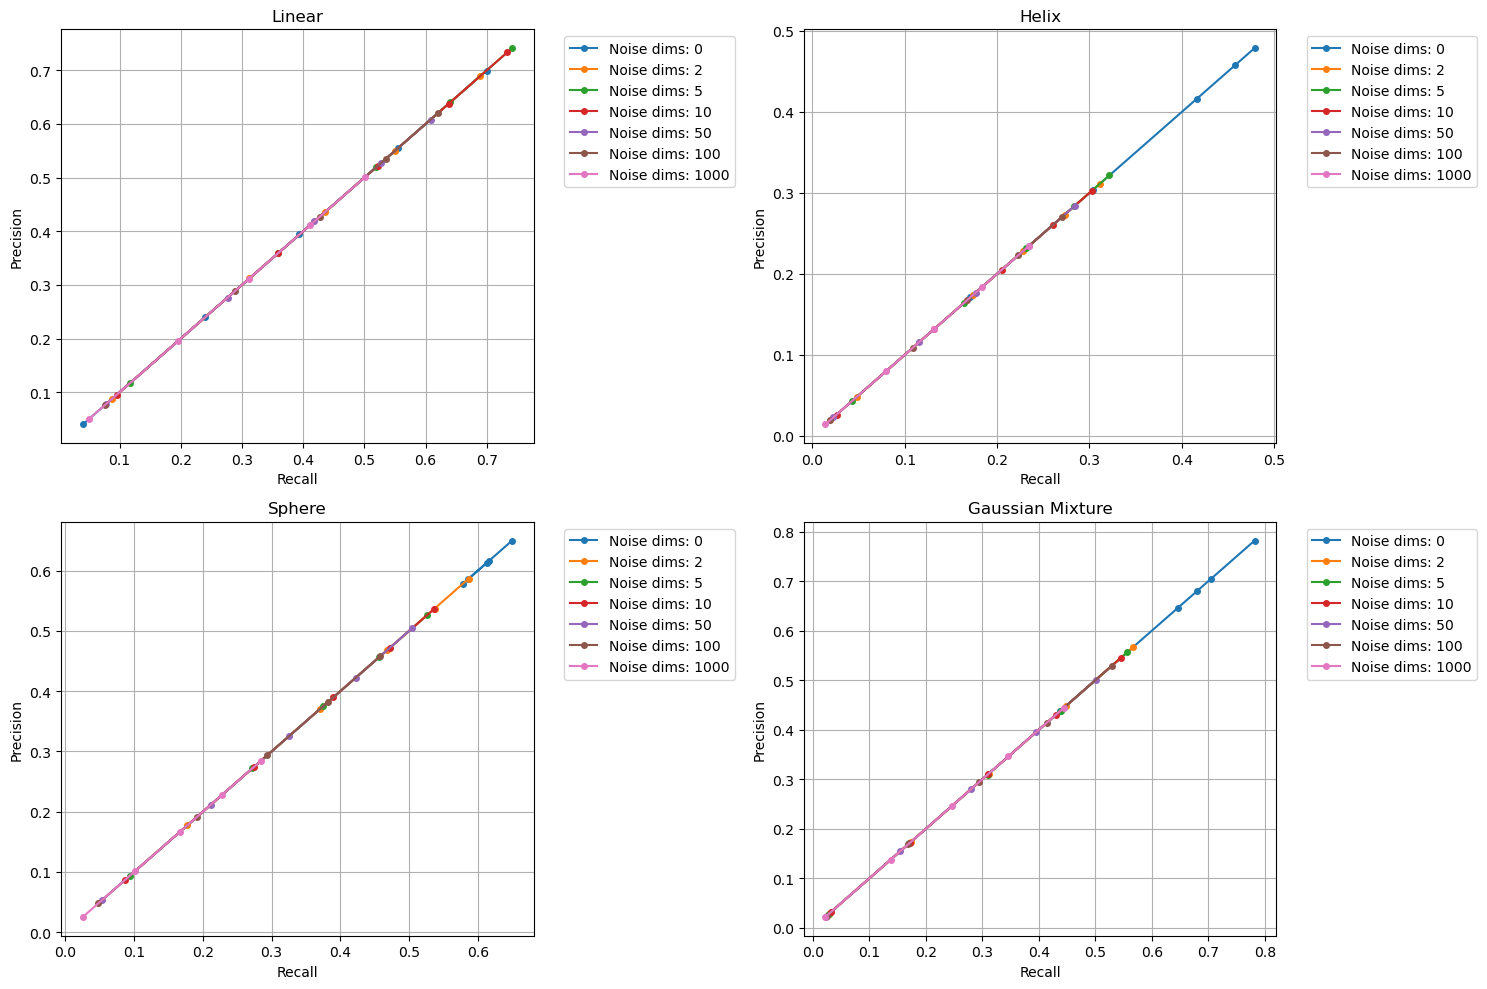

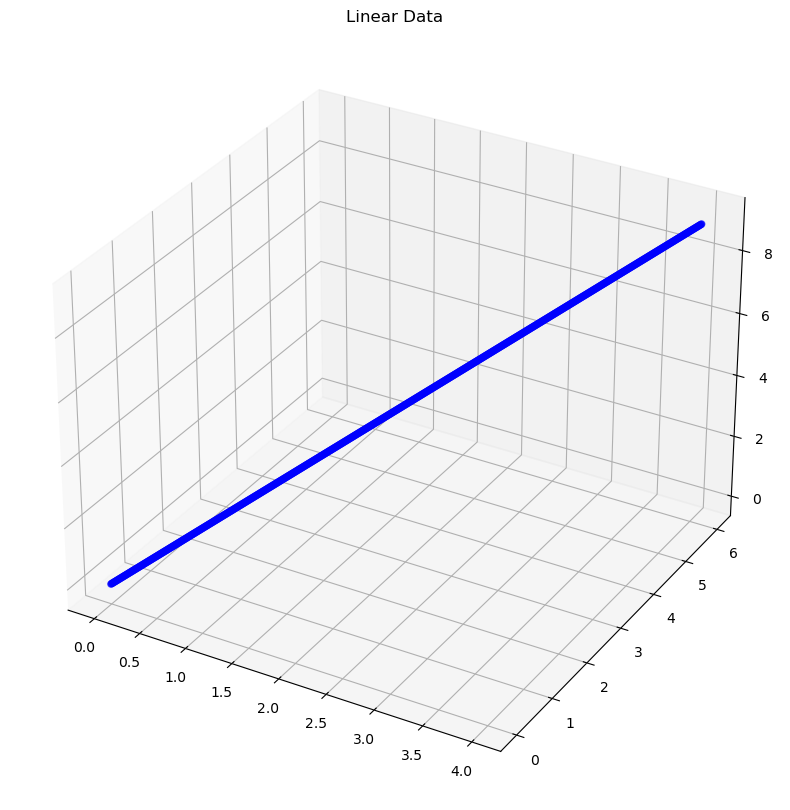

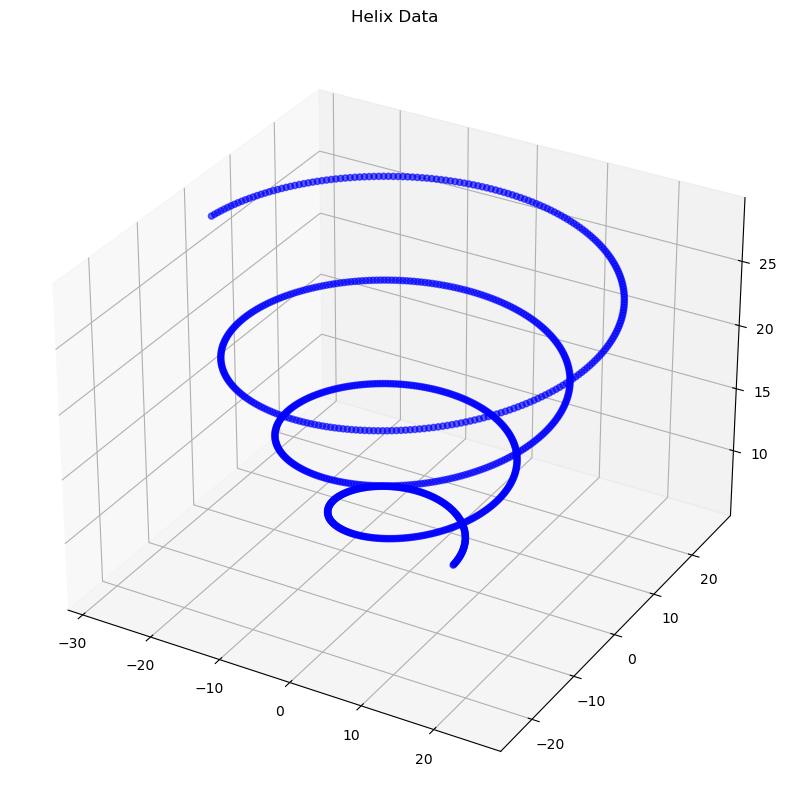

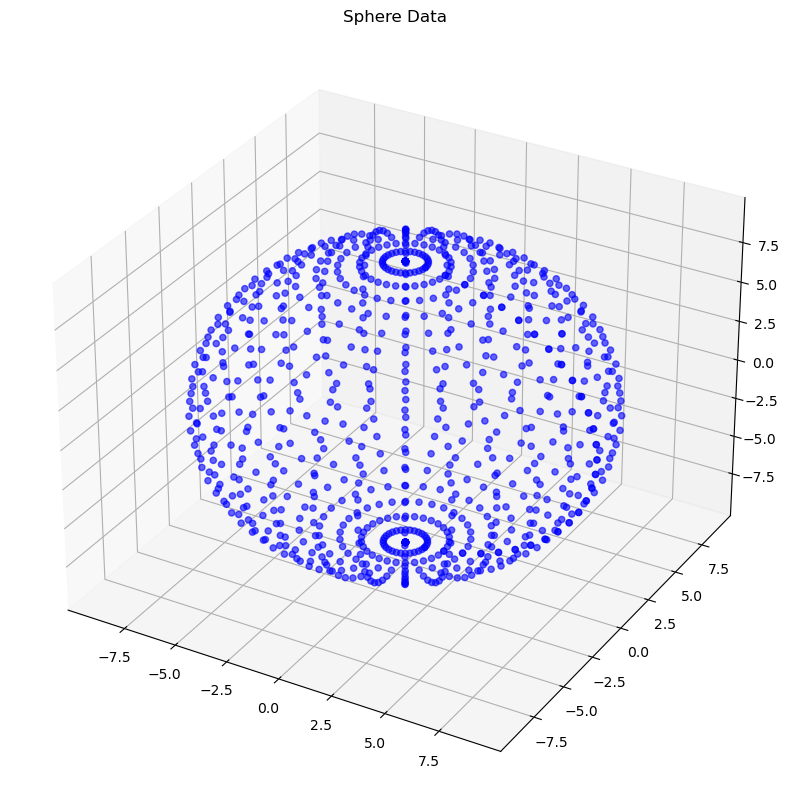

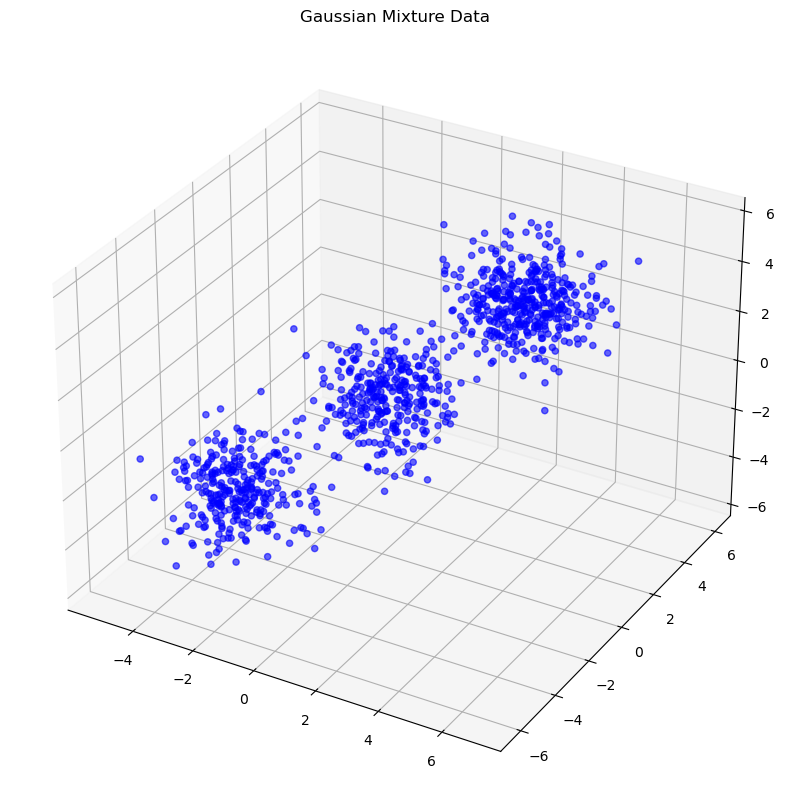

In [15]:
# Main experiment

n_samples = 1000
datasets = {
    'Linear': generate_linear_data(n_samples),
    'Helix': generate_helix_data(n_samples),
    'Sphere': generate_sphere_data(n_samples),
    'Gaussian Mixture': generate_gaussian_mixture_data(n_samples)
}

# Define noise dimensions to test
noise_dims = [0, 2, 5, 10, 50, 100, 1000]
k_values = np.arange(10, 260, 50)  # k values for precision-recall curve

# Create figure for precision-recall curves
plt.figure(figsize=(15, 10))

# Plot for each dataset
for idx, (name, data) in enumerate(datasets.items(), 1):
    print(f"\nProcessing {name} dataset...")

    # Compute true geodesic distances
    true_distances = compute_true_geodesic_distances(data, name)

    # Plot precision-recall curves for different noise dimensions
    plt.subplot(2, 2, idx)

    for n_noise in noise_dims:
        # Run URerF with noise
        similarity_matrix = run_urf_experiment(data, name, n_noise)

        # Compute precision and recall
        precisions, recalls = compute_geodesic_precision_recall(
            true_distances, similarity_matrix, k_values)

        # Plot precision-recall curve
        plt.plot(recalls, precisions, 
                label=f'Noise dims: {n_noise}',
                marker='o', markersize=4)

    plt.title(f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Also plot original 3D data for visualization
# for name, data in datasets.items():
#    plot_3d_data(data, f'{name} Data')



Processing Linear dataset...

Processing Helix dataset...

Processing Sphere dataset...

Processing Gaussian Mixture dataset...


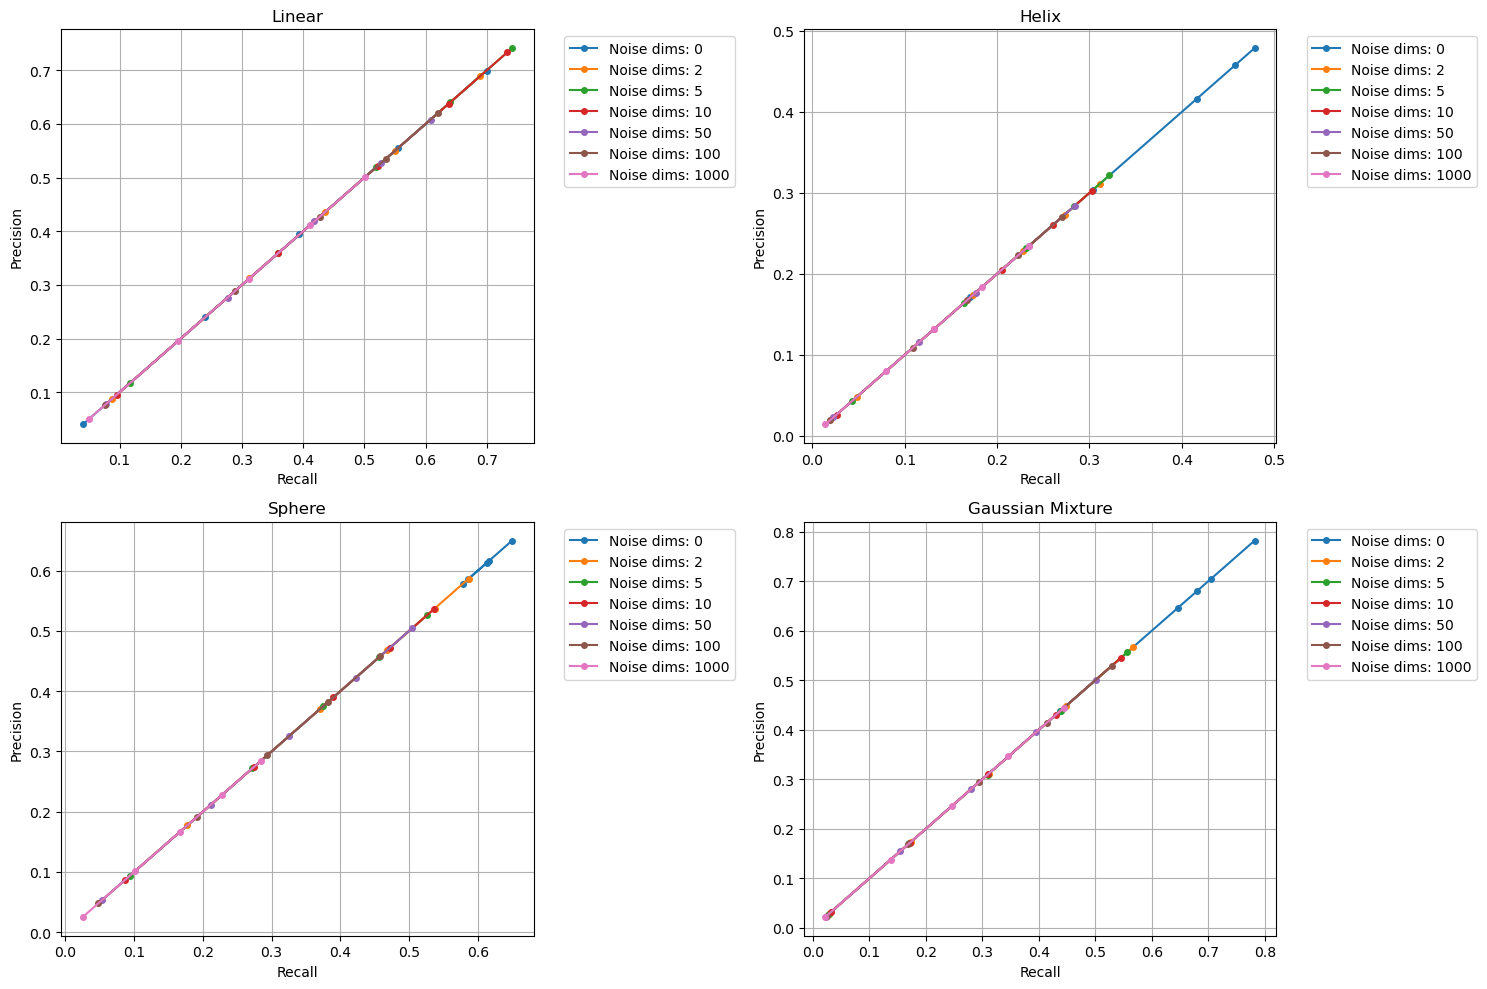

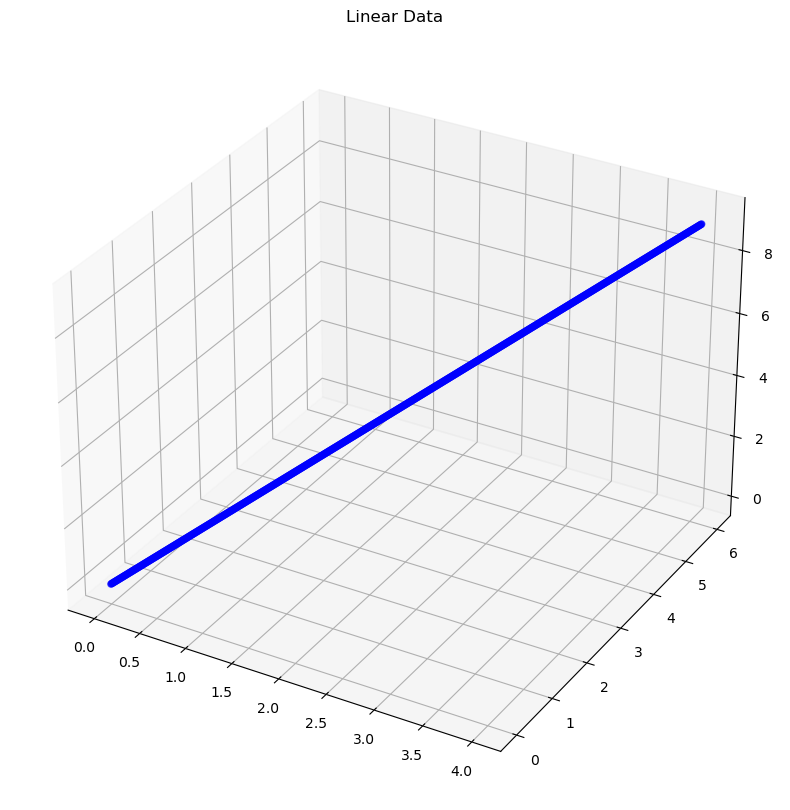

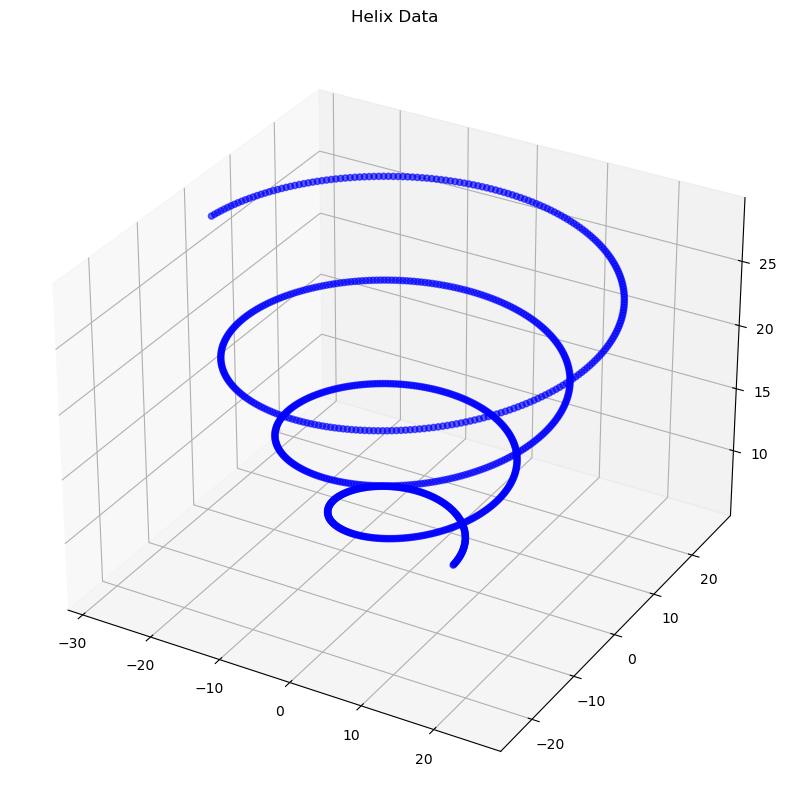

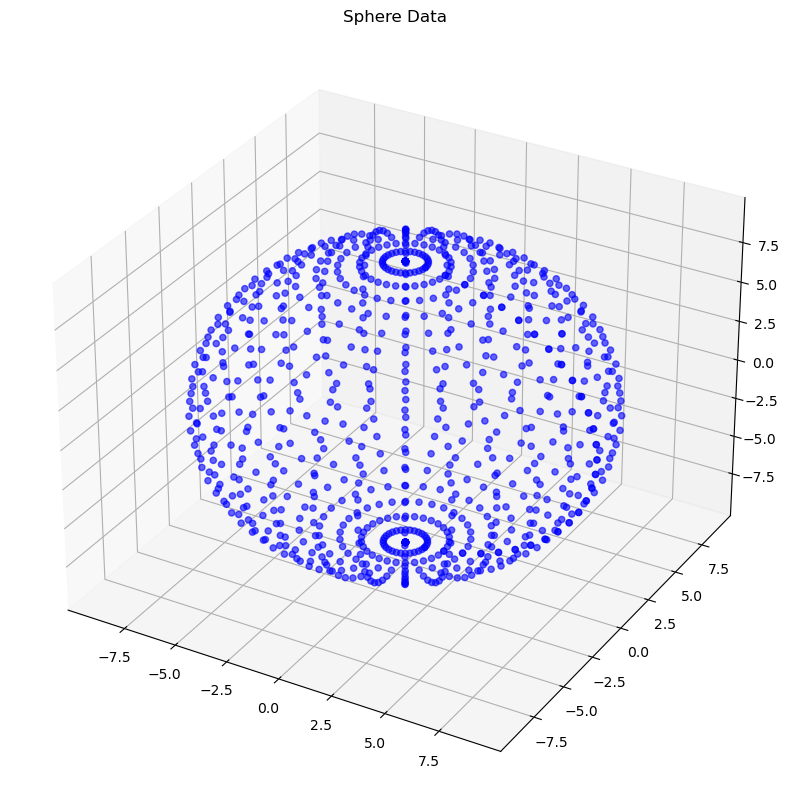

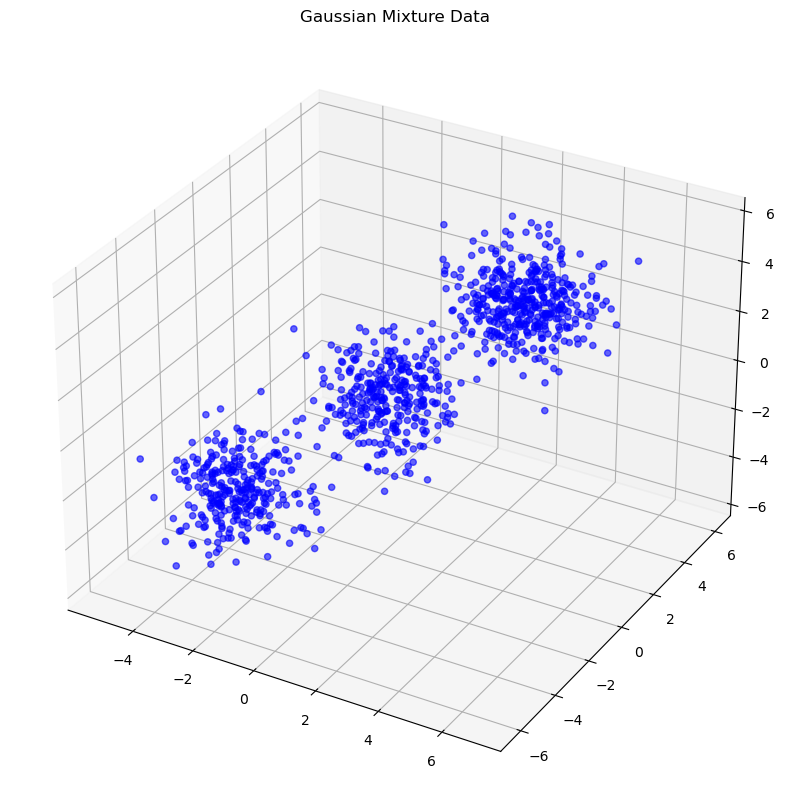

In [19]:
n_samples = 1000
datasets = {
    'Linear': generate_linear_data(n_samples),
    'Helix': generate_helix_data(n_samples),
    'Sphere': generate_sphere_data(n_samples),
    'Gaussian Mixture': generate_gaussian_mixture_data(n_samples)
}

# Define noise dimensions to test
noise_dims = [0, 2, 5, 10, 50, 100, 1000]
k_values = np.arange(10, 260, 50)  # k values for precision-recall curve

# Create figure for precision-recall curves
plt.figure(figsize=(15, 10))

# Plot for each dataset
for idx, (name, data) in enumerate(datasets.items(), 1):
    print(f"\nProcessing {name} dataset...")

    # Compute true geodesic distances
    true_distances = compute_true_geodesic_distances(data, name)

    # Plot precision-recall curves for different noise dimensions
    plt.subplot(2, 2, idx)

    for n_noise in noise_dims:
        # Run URerF with noise
        similarity_matrix = run_urf_experiment(data, name, n_noise)

        # Compute precision and recall
        precisions, recalls = compute_geodesic_precision_recall(
            true_distances, similarity_matrix, k_values)

        # Plot precision-recall curve
        plt.plot(recalls, precisions, 
                label=f'Noise dims: {n_noise}',
                marker='o', markersize=4)

    plt.title(f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Also plot original 3D data for visualization
for name, data in datasets.items():
    plot_3d_data(data, f'{name} Data')


Processing Linear dataset with rescaling...

Processing Helix dataset with rescaling...

Processing Sphere dataset with rescaling...

Processing Gaussian Mixture dataset with rescaling...


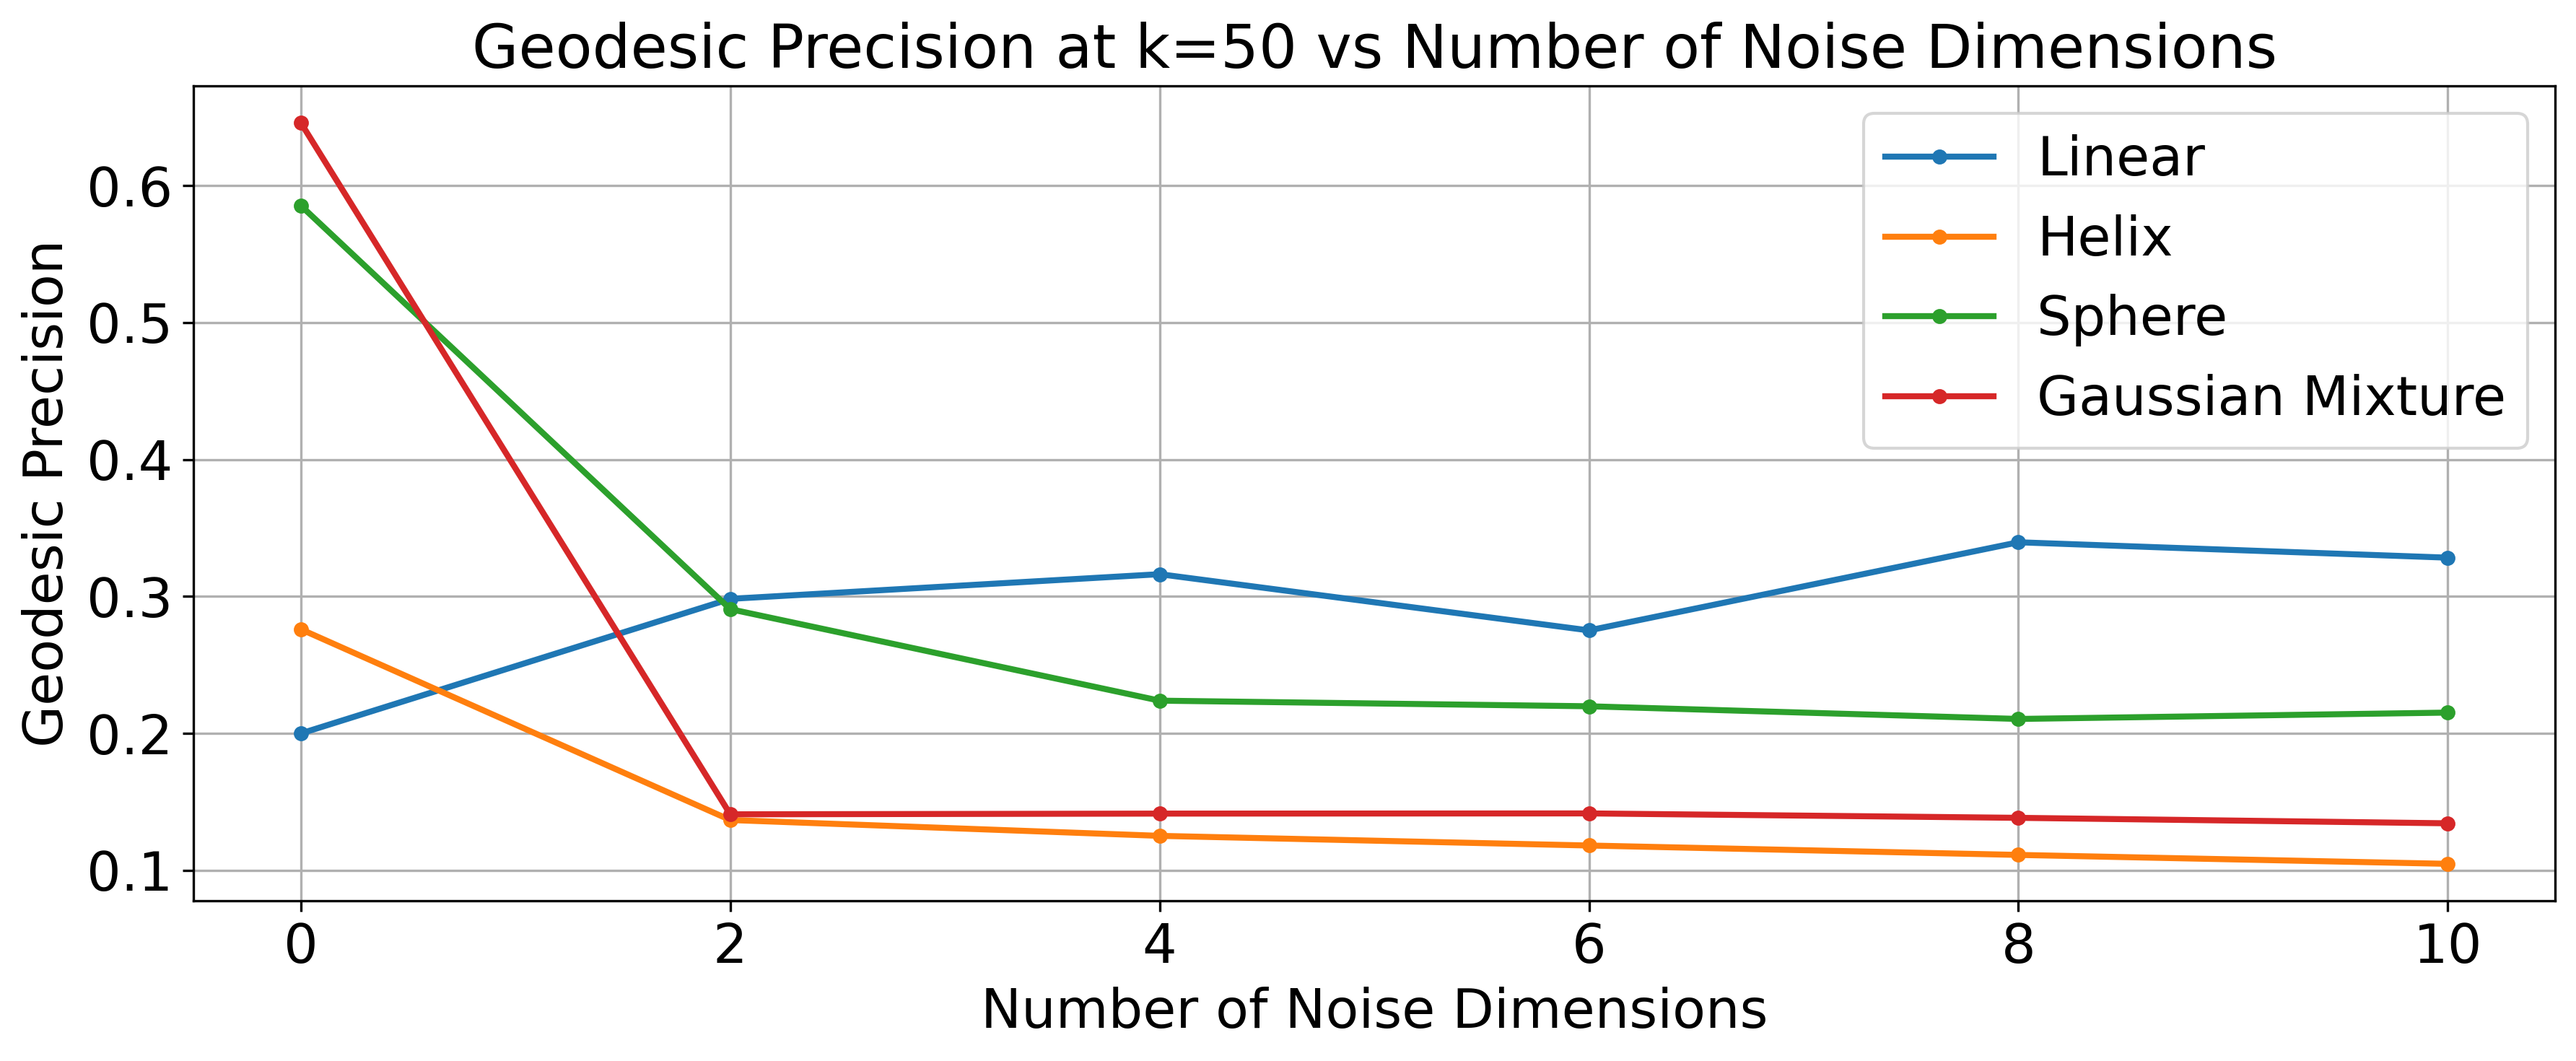

In [31]:
# Set the DPI for higher resolution
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Define font sizes
title_fontsize = 20
label_fontsize = 18
legend_fontsize = 18
tick_fontsize = 18

# Create second plot with rescaled dimensions
plt.figure(figsize=(12, 5))
k = 50  # Define k value for precision calculation
    
# Plot geodesic precision vs noise dimensions (rescaled)
for name, data in datasets.items():
    print(f"\nProcessing {name} dataset with rescaling...")
    
    # Compute true geodesic distances
    true_distances = compute_true_geodesic_distances(data, name)
    
    precisions = []
    noise_dims_small = [0, 2, 4, 6, 8, 10]
    
    for n_noise in noise_dims_small:
        # Scale the data before adding noise
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(data)
        
        # Run URerF with noise
        similarity_matrix = run_urf_experiment(X_scaled, name, n_noise)
        
        # Compute precision and recall for k=50
        precision, _ = compute_geodesic_precision_recall(
            true_distances, similarity_matrix, [k])
        precisions.append(precision[0])
    
    # Plot line for this dataset
    plt.plot(noise_dims_small, precisions, '-o', label=name, markersize=4, linewidth=2)

# Set font sizes for all elements
plt.title('Geodesic Precision at k=50 vs Number of Noise Dimensions', 
          fontsize=title_fontsize)
plt.ylabel('Geodesic Precision', fontsize=label_fontsize)
plt.xlabel('Number of Noise Dimensions', fontsize=label_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)

# Set tick font sizes
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.tight_layout()

# Save with high quality
plt.savefig('geodesic_precision_plot.png', 
            dpi=300,
            bbox_inches='tight',
            format='png',
            facecolor='white',
            edgecolor='none',
            pad_inches=0.1)

plt.show()